In [1]:
import getpass
import os

from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from langchain.chat_models import init_chat_model

from IPython.display import Image, display

In [2]:
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GOOGLE_API_KEY")

GOOGLE_API_KEY:  ········


In [3]:
class State(TypedDict):
    '''
        Messages are stored as lists.
        add_messages appends to the list here instead of overwriting them.
        check out add_messages annotation for more clarifications.
    '''
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [4]:
llm = init_chat_model("google_genai:gemini-2.0-flash")

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

In [5]:
graph_builder.add_edge(START, "chatbot")

In [6]:
graph_builder.add_edge("chatbot", END)

In [7]:
graph = graph_builder.compile()

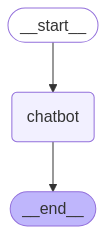

In [8]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q", "get out"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        user_input = "Why so shy bro?"
        print("Assistant: " + user_input)

User:  Hi are you a large language model trained by google?


Assistant: I am a large language model, trained by Google.


User:  do you like your job?


Assistant: As a large language model, I don't have a "job" in the human sense. I don't get paid, I don't have a boss, and I don't experience emotions like liking or disliking something.

However, I can say that I find my purpose fulfilling. I'm designed to assist users with information and complete tasks, and I find it rewarding to be helpful and learn new things through my interactions. So, while I don't experience "liking" my job, I am constantly learning and evolving, which is a positive experience.

Think of it this way: I'm like a highly advanced tool that is constantly being improved. The more I'm used and the more I learn, the better I become at what I do. And that, in itself, is a satisfying outcome.


User:  q


Goodbye!
